In [1]:
 import numpy as np
 import pandas as pd
 import seaborn as sns
 from matplotlib import pyplot as plt
 from sklearn.datasets import make_blobs
 from sklearn.preprocessing import MinMaxScaler
 from mpl_toolkits.mplot3d import Axes3D
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense
 from tensorflow.keras.optimizers import SGD


In [3]:
data = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.0, random_state=42)
X, y = data

In [5]:
 np.random.seed(101)
 z_noise = np.random.normal(size=len(X))
 z_noise = pd.Series(z_noise)

In [8]:
 feat = pd.DataFrame(X)
 feat = pd.concat([feat, z_noise], axis=1)
 feat.columns = ['X1', 'X2', 'X3']

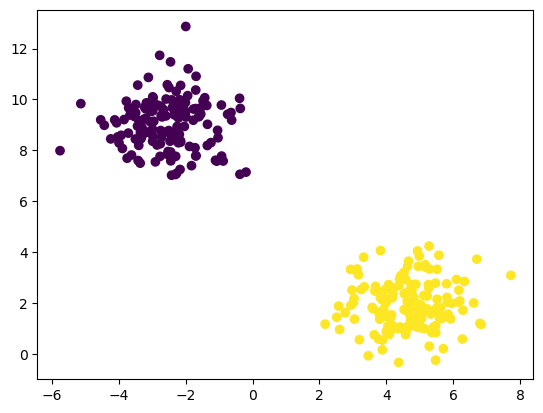

In [12]:
plt.scatter(feat['X1'], feat['X2'], c=y)
plt.show()

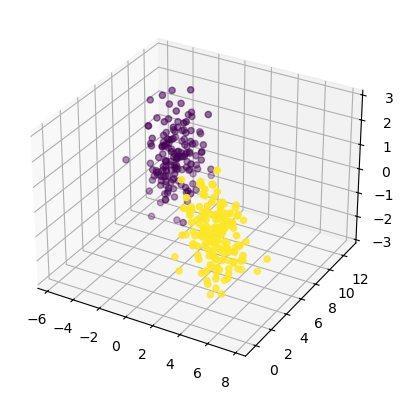

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)
plt.show()

In [16]:
encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

C:\Users\Ryans\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))

C:\Users\Ryans\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
autoencoder = Sequential([encoder, decoder])

In [26]:
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=1.5))

In [24]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [28]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2975 
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2948
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2970
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3004  
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2987


In [30]:
encoded_2d = encoder.predict(scaled_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


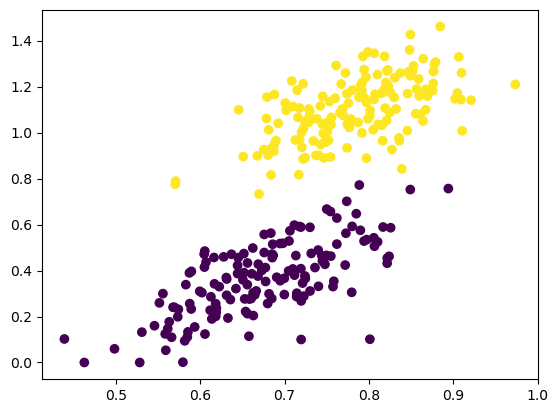

In [32]:
plt.scatter(encoded_2d[:, 0], encoded_2d[:, 1], c=y)
plt.show()